<a href="https://colab.research.google.com/github/ashirwadsangwan/Practical-Deep-Learning/blob/master/fine_grained_cl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *



In [0]:
help(untar_data)


Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [0]:
data_url = URLs.PETS

path = untar_data(data_url)

print(path.ls())

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'), PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]


In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_189.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_98.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_103.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_41.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Persian_169.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms = get_transforms(), size=224 )
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
samoyed,scottish_terrier,Maine_Coon,shiba_inu,samoyed
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Sphynx,german_shorthaired,Maine_Coon,samoyed,samoyed
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

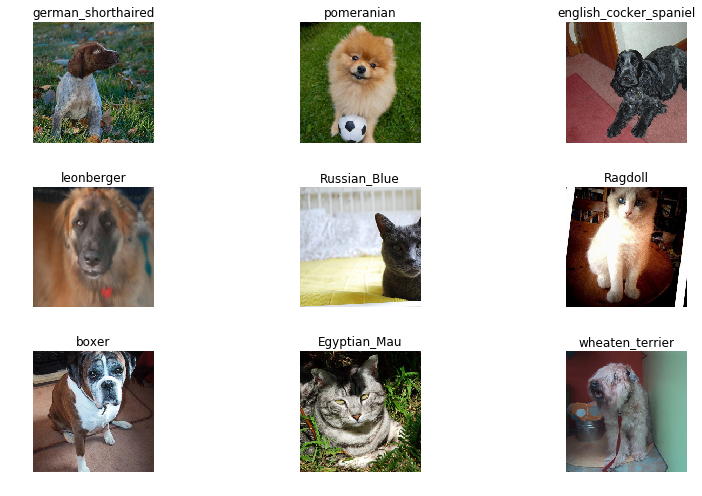

In [0]:
data.show_batch(rows = 3, figsize = (12,7))

In [0]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## Training ResNet34

In [0]:
learn = create_cnn(data, models.resnet34, metrics = error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 25841893.75it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.381814,0.295050,0.086604,01:24
1,0.566912,0.221894,0.067659,01:22
2,0.359827,0.190732,0.059540,01:22
3,0.263384,0.179554,0.058863,01:22


In [0]:
learn.save('Stage-1')

## Results

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

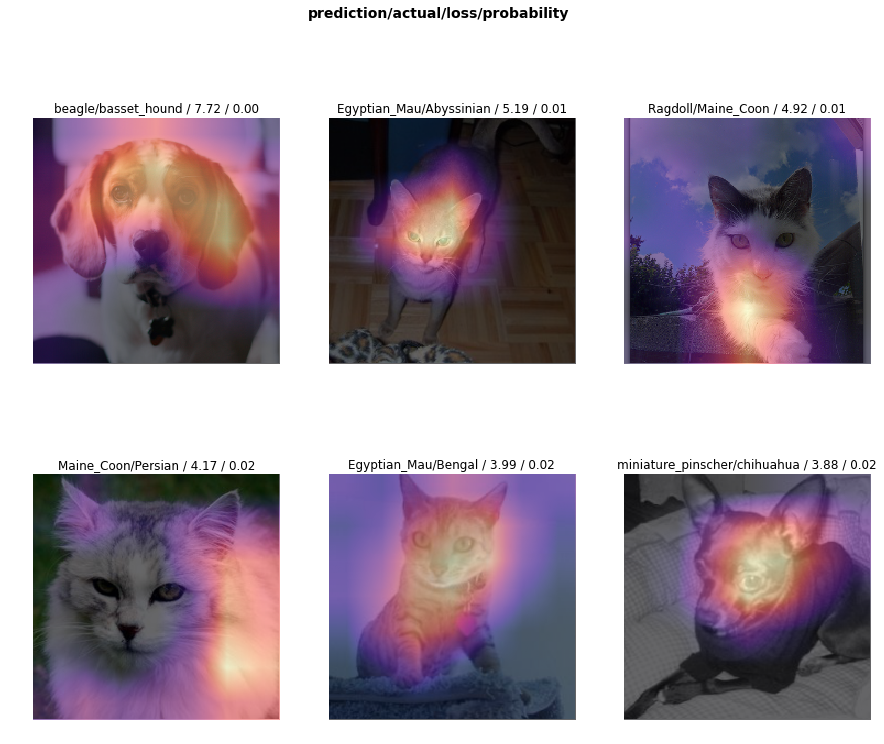

In [0]:
interp.plot_top_losses(6, figsize = (15,12))

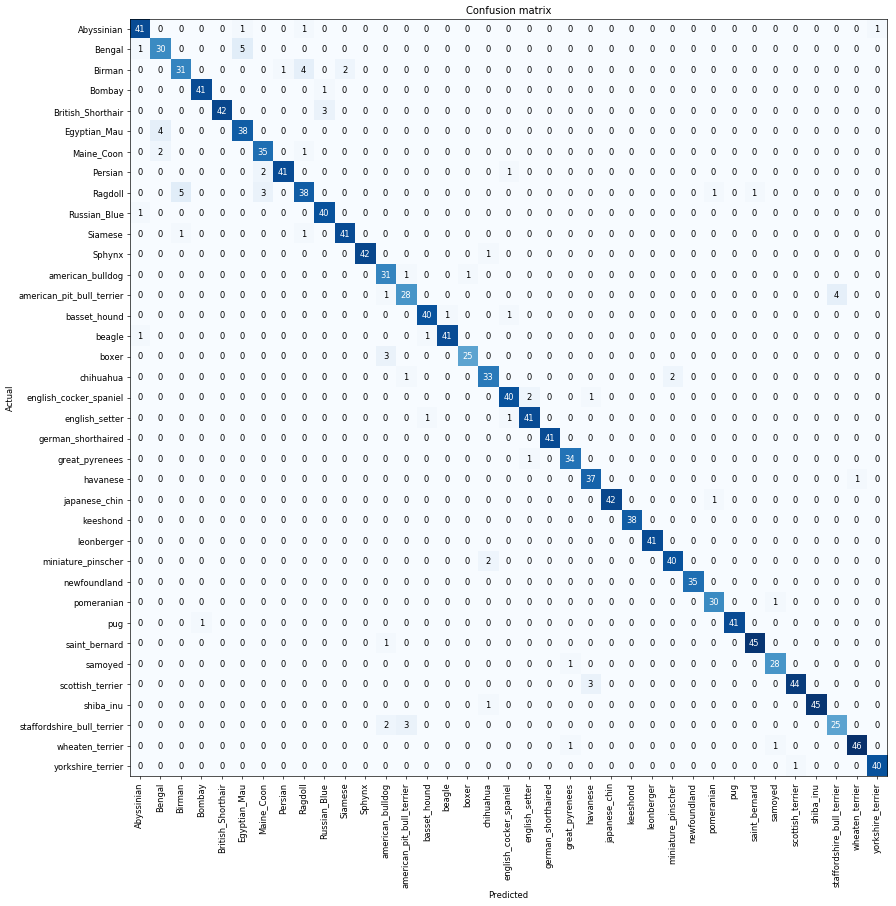

In [0]:
interp.plot_confusion_matrix(figsize=(15,15),dpi=60)

The most confused categories.

In [0]:
interp.most_confused(min_val=3)

[('Bengal', 'Egyptian_Mau', 5),
 ('Ragdoll', 'Birman', 5),
 ('Birman', 'Ragdoll', 4),
 ('Egyptian_Mau', 'Bengal', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Ragdoll', 'Maine_Coon', 3),
 ('boxer', 'american_bulldog', 3),
 ('scottish_terrier', 'havanese', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3)]

In [0]:
# Unfreezing, fine-tuning and learning rates

# since our model is working as we expect it to, we'll unfreeze it and train some more.

learn.unfreeze()


In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.568643,0.301861,0.102842,01:25


So, the error rate increased by unfreezing the model. We'll reload it from where we saved it as stage-1 and find out about the learning rate.

In [0]:
learn.load('Stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
samoyed,scottish_terrier,Maine_Coon,shiba_inu,samoyed
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Sphynx,german_shorthaired,Maine_Coon,samoyed,samoyed
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


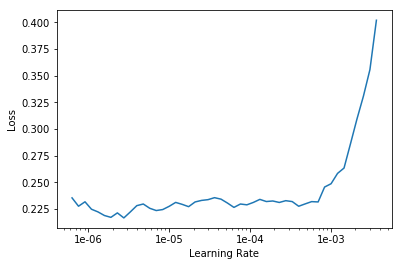

In [0]:
learn.recorder.plot()

So, from the learning rate graph we can see that error is increasing when the lr is going beyond 1e-5 so we'll put the learning rate below that while unfreezing.

In [0]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr = slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.225531,0.176780,0.058187,01:23
1,0.227407,0.181689,0.058863,01:24
2,0.176723,0.170307,0.062246,01:25
3,0.129284,0.151086,0.050744,01:23
4,0.104998,0.149428,0.047361,01:24


## ResNet 50


In [0]:

data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
samoyed,scottish_terrier,Maine_Coon,British_Shorthair,shiba_inu
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
leonberger,yorkshire_terrier,yorkshire_terrier,wheaten_terrier,Bombay
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

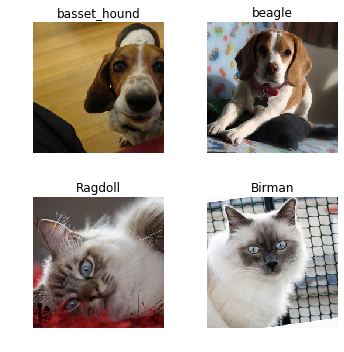

In [0]:
data.show_batch(rows=2, figsize=(5,5))

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:04<00:00, 24873053.42it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


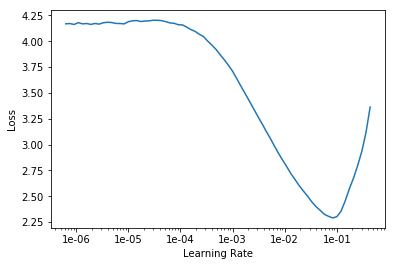

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.839144,0.306768,0.102165,01:28
1,0.402752,0.289821,0.098106,01:29
2,0.262373,0.217442,0.069012,01:28
3,0.178490,0.207905,0.068336,01:30


In [0]:
learn.save('resnet50-1')


In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.140482,0.203714,0.066982,01:32
1,0.125715,0.199548,0.065629,01:33


So, fine-tuning is not working. We'll reload our model and work on interpretation.

In [0]:
learn.load('resnet50-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
samoyed,scottish_terrier,Maine_Coon,British_Shorthair,shiba_inu
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
leonberger,yorkshire_terrier,yorkshire_terrier,wheaten_terrier,Bombay
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=3)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 12),
 ('Ragdoll', 'Birman', 6),
 ('Bengal', 'Egyptian_Mau', 5),
 ('basset_hound', 'beagle', 3),
 ('english_setter', 'english_cocker_spaniel', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('yorkshire_terrier', 'havanese', 3)]

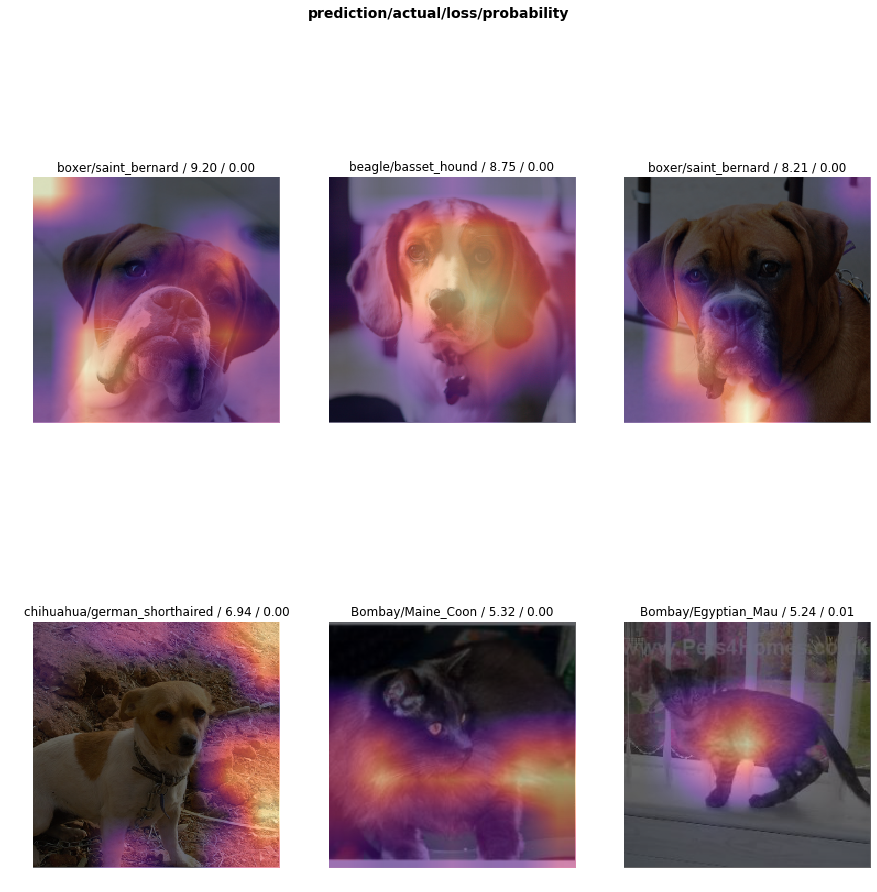

In [0]:
interp.plot_top_losses(6, figsize=(15,15))

In [0]:
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms = tfms, size=26)


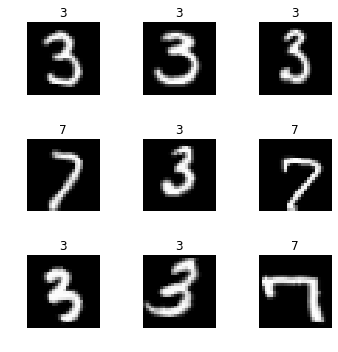

In [0]:
data.show_batch(rows = 3, figsize=(5,5))

In [0]:
learn = cnn_learner(data, models.resnet18, metrics = accuracy)
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.159670,0.083205,0.974975,00:16
1,0.107662,0.046300,0.984789,00:17


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


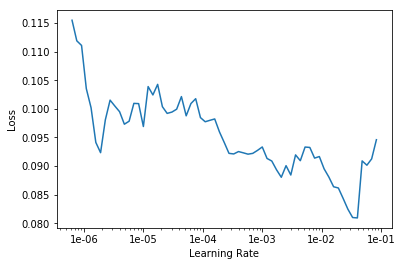

In [0]:
learn.recorder.plot()

In [0]:
learn.save('resnet-18')

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(3, max_lr = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.074441,0.036605,0.987733,00:18
1,0.054825,0.026163,0.991659,00:17
2,0.053316,0.024387,0.993131,00:17
